In [11]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.decomposition import KernelPCA
import matplotlib.pyplot as plt
import pickle

In [12]:
df = pd.read_csv('my_data3.csv')
df

,mol_id,smiles,A,B,C,mu,alpha,homo,lumo,gap,...,JGI5,JGI8,JGI9,JGI10,JGT10,Diameter,Radius,TopoShapeIndex,SRW05,mZagreb2
0,gdb_1183,CC(O)(CO)C=O,0.580365,0.372748,0.511762,0.158544,0.145347,0.410201,0.493628,0.432677,...,0.000000,0.0,0.0,0.0,0.614224,0.2,0.0,1.000000,0.000000,0.419355
1,gdb_63812,CC1(O)CC2C3OC2C13,0.440447,0.241719,0.357201,0.162136,0.456350,0.520789,0.844828,0.618500,...,0.000000,0.0,0.0,0.0,0.607690,0.2,0.0,1.000000,0.559406,0.344086
2,gdb_88111,CN1CC11COC=NC1,0.329925,0.255493,0.305969,0.145933,0.490906,0.517360,0.703898,0.517789,...,0.500000,0.0,0.0,0.0,0.532658,0.4,0.5,0.666667,0.755340,0.580645
3,gdb_45247,N=C1OC2CC3CN3C12,0.391164,0.325798,0.359054,0.164453,0.428160,0.461209,0.664543,0.524904,...,0.000000,0.0,0.0,0.0,0.412109,0.2,0.0,1.000000,0.755340,0.440860
4,gdb_131665,c1c(onc1C=O)CO,0.885884,0.109410,0.128702,0.229420,0.349045,0.341192,0.321964,0.351396,...,0.222222,0.0,0.0,0.0,0.416905,0.6,0.5,1.000000,0.440594,0.806452
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18787,gdb_121987,CCOCC(C)NC=O,0.443725,0.069990,0.093846,0.223306,0.573204,0.445778,0.744378,0.593049,...,0.111111,0.0,0.0,0.0,0.358791,0.8,1.0,0.750000,0.000000,0.935484
18788,gdb_90465,CC1OC2C(O1)C2C#C,0.339243,0.240803,0.297980,0.041694,0.463474,0.500643,0.766492,0.574439,...,0.472222,0.0,0.0,0.0,0.564046,0.6,0.5,1.000000,0.783233,0.612903
18789,gdb_45073,O=C1CC2OC2C1C#N,0.260451,0.315738,0.274104,0.326080,0.327523,0.315045,0.423913,0.442802,...,0.000000,0.0,0.0,0.0,0.466810,0.2,0.0,1.000000,0.755340,0.612903
18790,gdb_49724,O=CN1C2CCC2C1=O,0.337034,0.255190,0.253193,0.310049,0.418157,0.400343,0.463268,0.416804,...,0.500000,0.0,0.0,0.0,0.490129,0.4,0.5,0.666667,0.000000,0.634409


Применение метода PCA к датафрейму

In [13]:
pca = PCA()
pca = pca.fit(df.iloc[:, 2:])
pcs = pca.transform(df.iloc[:, 2:])

Построение графика каменистой осыпи для метода PCA, для дальнейшего определения наилучшего параметра

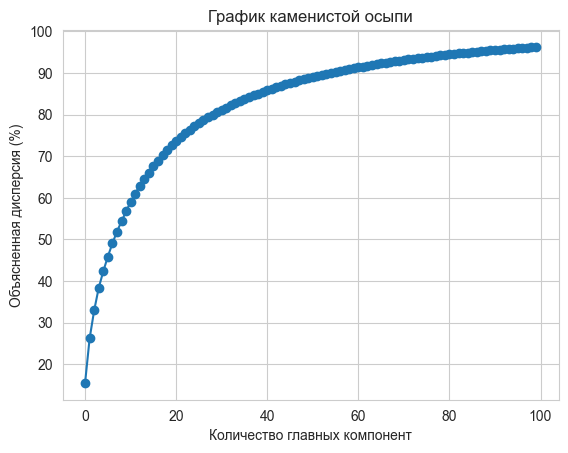

In [14]:
explained_variance_ratio_pca = pca.explained_variance_ratio_

# Строим график каменистой осыпи
plt.plot(np.cumsum(explained_variance_ratio_pca[:100]) * 100, marker='o', linestyle='-')
plt.xlabel('Количество главных компонент')
plt.ylabel('Объясненная дисперсия (%)')
plt.title('График каменистой осыпи')
plt.show()

Разделение на тестовую и обучающую выборки

In [15]:
X = df.drop('gap', axis=1)
X = X.select_dtypes(exclude=['object'])
y = df['gap']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=41)

Применение наилучшего параметра "кол-во компонентов" в виде "60"

In [16]:
pca = PCA(n_components=60)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

Визуализация после применения параметра

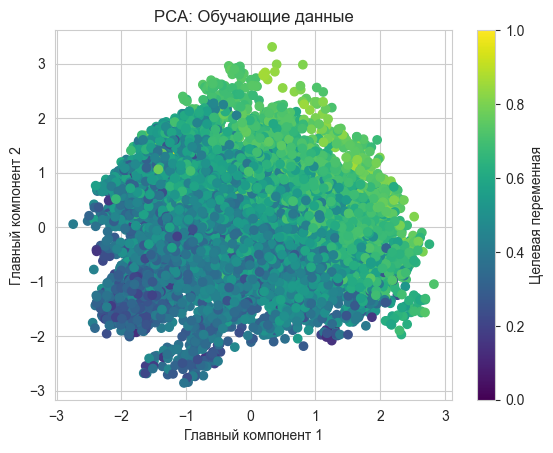

In [17]:
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, cmap='viridis')
plt.xlabel('Главный компонент 1')
plt.ylabel('Главный компонент 2')
plt.title('PCA: Обучающие данные')
plt.colorbar(label='Целевая переменная')
plt.show()

Применение метода KPCA к датафрейму

In [18]:
kpca = KernelPCA()
kpca = kpca.fit_transform(df.iloc[:, 2:])

Построение графика каменистой осыпи для метода KPCA, для дальнейшего определения наилучшего параметра

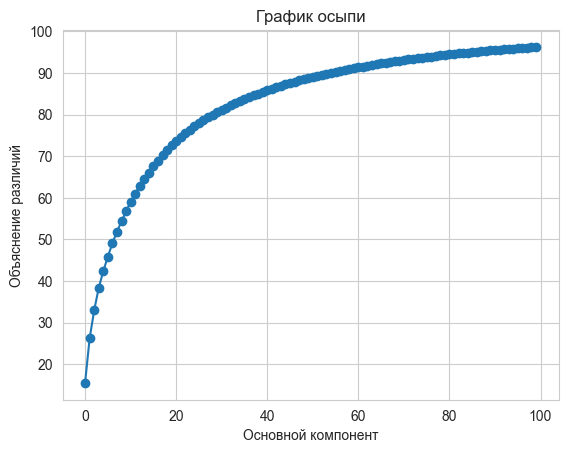

In [19]:
explained_variance = np.var(kpca, axis=0)
explained_variance_ratio = explained_variance / np.sum(explained_variance)

# Строим график каменистой осыпи
plt.plot(np.cumsum(explained_variance_ratio[:100]) * 100, marker='o', linestyle='-')
plt.title('График осыпи')
plt.xlabel('Основной компонент')
plt.ylabel('Объяснение различий')
plt.show()

Применение наилучшего параметра "кол-во компонентов" в виде "60"


In [20]:
kpca = KernelPCA(n_components=60)
X_train_kpca = kpca.fit_transform(X_train)
X_test_kpca = kpca.transform(X_test)

Визуализация после применения параметра

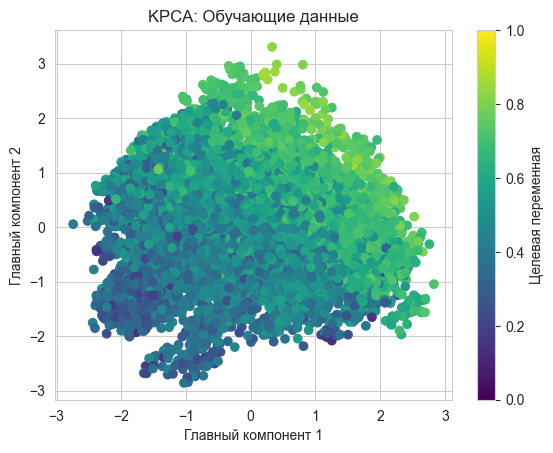

In [21]:
plt.scatter(X_train_kpca[:, 0], X_train_kpca[:, 1], c=y_train, cmap='viridis')
plt.xlabel('Главный компонент 1')
plt.ylabel('Главный компонент 2')
plt.title('KPCA: Обучающие данные')
plt.colorbar(label='Целевая переменная')
plt.show()

Сохранение двух датафреймов после использования на них KPCA и PCA соответственно

In [22]:
kpca = KernelPCA(n_components=60)
kpca_data = kpca.fit_transform(df.iloc[:, 2:])
kpca_data = pd.DataFrame(kpca_data)
kpca_data.to_csv('my_data4_kpca.csv', index=False)

pca = PCA(n_components=60)
pca_data = pca.fit_transform(df.iloc[:, 2:])
pca_data = pd.DataFrame(pca_data)
pca_data.to_csv('my_data4_pca.csv', index=False)

I choose 60 components because, if we take 60 and more, процент объясняемости данных не значительно увеличивается.